In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('apto_results_final.csv')

In [3]:
df

,link,address,area,bedrooms,bathrooms,garages,others,price,condo,date,neighborhood
0,https://www.vivareal.com.br/imovel/apartamento...,"Rua dos Piquiroes, 121 - Jardim Aquarius, São ...",75,2,2,0.0,"Elevador, Piscina, Churrasqueira, Salão de fes...",2850,526.0,2021-06-20 09:31:00,Jardim Aquarius
1,https://www.vivareal.com.br/imovel/apartamento...,"Rua Francisco Ricci, 150 - Vila Ema, São José ...",147,3,4,2.0,"Elevador, Piscina, Área de serviço, Churrasque...",4290,590.0,2021-06-20 09:31:00,Vila Ema
2,https://www.vivareal.com.br/imovel/apartamento...,"Jardim Aquarius, São José dos Campos - SP",98,3,2,2.0,"Elevador, Piscina, Churrasqueira, Condomínio f...",1600,560.0,2021-06-20 09:31:00,Jardim Aquarius
3,https://www.vivareal.com.br/imovel/apartamento...,"Jardim Aquarius, São José dos Campos - SP",98,4,3,2.0,"Elevador, Piscina, Área de serviço, Churrasque...",2600,688.0,2021-06-20 09:31:00,Jardim Aquarius
4,https://www.vivareal.com.br/imovel/apartamento...,"Urbanova, São José dos Campos - SP",54,2,2,1.0,0,1500,350.0,2021-06-20 09:31:00,Urbanova
...,...,...,...,...,...,...,...,...,...,...,...
2883,https://www.vivareal.com.br/imovel/apartamento...,"Vila Iracema, São José dos Campos - SP",45,2,1,1.0,0,700,277.0,2021-06-20 09:50:00,Vila Iracema
2884,https://www.vivareal.com.br/imovel/apartamento...,"Jardim Santa Inês III, São José dos Campos - SP",70,2,1,1.0,0,820,230.0,2021-06-20 09:50:00,Jardim Santa Inês III
2885,https://www.vivareal.com.br/imovel/apartamento...,"Residencial Frei Galvao, São José dos Campos - SP",70,2,1,1.0,0,1100,280.0,2021-06-20 09:50:00,Residencial Frei Galvao
2886,https://www.vivareal.com.br/imovel/apartamento...,"Jardim Sao Jose II, São José dos Campos - SP",46,2,1,1.0,0,1030,145.0,2021-06-20 09:50:00,Jardim Sao Jose II


In [4]:
df.columns

Index(['link', 'address', 'area', 'bedrooms', 'bathrooms', 'garages', 'others',
       'price', 'condo', 'date', 'neighborhood'],
      dtype='object')

In [5]:
df.shape

(2888, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   link          2888 non-null   object 
 1   address       2888 non-null   object 
 2   area          2888 non-null   int64  
 3   bedrooms      2888 non-null   int64  
 4   bathrooms     2888 non-null   int64  
 5   garages       2888 non-null   float64
 6   others        2888 non-null   object 
 7   price         2888 non-null   int64  
 8   condo         2888 non-null   float64
 9   date          2888 non-null   object 
 10  neighborhood  2888 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 248.3+ KB


In [7]:
df.describe()

,area,bedrooms,bathrooms,garages,price,condo
count,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000
mean,87.129501,2.272853,1.817521,1.444945,2999.924169,755.848684
std,64.293840,0.888091,1.228181,0.912760,13953.800318,11747.682597
min,10.000000,1.000000,1.000000,0.000000,460.000000,0.000000
25%,50.000000,2.000000,1.000000,1.000000,1200.000000,300.000000
50%,65.000000,2.000000,1.000000,1.000000,1735.000000,400.000000
75%,96.000000,3.000000,2.000000,2.000000,2850.000000,600.000000
max,652.000000,6.000000,8.000000,9.000000,530000.000000,629000.000000


In [8]:
df.isnull().sum()

link            0
address         0
area            0
bedrooms        0
bathrooms       0
garages         0
others          0
price           0
condo           0
date            0
neighborhood    0
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df = df[df['price'] < 100000]

In [11]:
df = df[df['condo'] < 10000]

In [12]:
neigh = df.neighborhood.unique()
neigh = np.sort(neigh)

In [13]:
for i in neigh:
    print(i)

Altos do Esplanada
Boa Esperança
Bosque dos Eucaliptos
Cajurú
Campos de Sao Jose
Centro
Chacara dos Eucaliptos
Chácaras São José
Cidade Morumbi
Cidade Vista Verde
Condominio Spazio Campo Azuli
Condomínio Residencial Jaguary 
Condomínio Royal Park
Conjunto Residencial Flamboyant
Conjunto Residencial Galo Branco
Conjunto Residencial Trinta e Um de Março
Floradas de São José
Jardim Altos Esplanada
Jardim Alvorada
Jardim Americano
Jardim América
Jardim Aparecida
Jardim Apolo
Jardim Apolo II
Jardim Aquarius
Jardim Augusta
Jardim Bela Vista
Jardim Castanheira
Jardim Cerejeiras
Jardim Colorado
Jardim Copacabana
Jardim Del Rey
Jardim Esplanada
Jardim Esplanada II
Jardim Ismenia
Jardim Margareth
Jardim Mariana II
Jardim Maringá
Jardim Nova Anchieta
Jardim Nova Michigan
Jardim Oriental
Jardim Oriente
Jardim Oswaldo Cruz
Jardim Ouro Preto
Jardim Paraiso do Sol
Jardim Paulista
Jardim Petrópolis
Jardim San Marino
Jardim Santa Inês I
Jardim Santa Inês II
Jardim Santa Inês III
Jardim Santa Júlia
Jard

In [14]:
centro = ['Centro','Chacara dos Eucaliptos','Jardim Altos Esplanada','Jardim Aparecida','Jardim Apolo','Jardim Apolo II',
'Jardim Augusta','Jardim Bela Vista','Jardim Esplanada','Jardim Esplanada II','Jardim Margareth','Jardim Maringá',
'Jardim Oswaldo Cruz','Jardim Paulista','Jardim Sao Jose II','Jardim São Dimas','Jardim São José','Monte Castelo',
'Sao Dimas','Vila Adyana','Vila Betânia','Vila Cardoso','Vila Ema','Vila Guaianazes','Vila Maria','Vila Paganini',
'Vila Piratininga','Vila Sanches','Vila São Pedro','Vila Terezinha']

sul = ['Sul','Bosque dos Eucaliptos','Cidade Morumbi','Floradas de São José','Jardim América','Jardim Del Rey','Jardim Oriental',
'Jardim Oriente','Jardim Petrópolis','Jardim Satélite','Jardim Sul','Jardim Terras do Sul','Jardim Vale do Sol','Jardim Veneza',
'Palmeiras de São José','Parque Industrial','Parque Interlagos','Residencial Bosque dos Ipês','Residencial União','Vila Nair',
'Vila São Bento']

leste = ['Leste','Boa Esperança','Cajurú','Campos de Sao Jose','Cidade Vista Verde','Conjunto Residencial Galo Branco','Jardim Americano',
'Jardim Castanheira','Jardim Cerejeiras','Jardim Copacabana','Jardim Mariana II','Jardim Nova Michigan','Jardim Santa Inês I',
'Jardim Santa Inês II','Jardim Santa Inês III','Jardim São Vicente','Jardim das Paineiras I','Jardim das Paineiras II',
'Parque Nova Esperança','Residencial Frei Galvao','Vila Industrial','Vila Tatetuba','Vila Tesouro','Vista Linda']

oeste = ['Oeste','Altos do Esplanada', 'Condomínio Royal Park','Jardim Alvorada','Jardim Aquarius','Jardim das Colinas',
'Jardim das Indústrias','Parque Residencial Aquarius','Urbanova','Urbanova I','Urbanova V']

norte = ['Norte','Jardim Ouro Preto','Jardim Telespark','Santana','Vila Alexandrina','Vila Cristina','Vila Rangel','Vila Rossi',
'Vila São Geraldo','Vila Zizinha']

sudeste = ['Sudeste','Chácaras São José','Conjunto Residencial Flamboyant','Jardim Santo Onofre','Jardim Souto','Jardim São Judas Tadeu',
'Jardim São Leopoldo','Jardim da Granja','Putim','Vila Iracema']

In [15]:
def checar_zona(df,lista):
    df = df[df.address.str.contains(('|').join(lista))]
    df['zona'] = str(lista[0])
    return df

In [16]:
df1 = checar_zona(df,sudeste)
df2 = checar_zona(df,sul)
df3 = checar_zona(df,leste)
df4 = checar_zona(df,centro)
df5 = checar_zona(df,norte)
df6 = checar_zona(df,oeste)

In [17]:
nenhuma = ['Nenhuma']
bairros = nenhuma + oeste + sul + leste + centro + norte + sudeste
def checar_zona_nenhuma(df,lista):
    df = df[~df.address.str.contains(('|').join(lista))]
    df['zona'] = str(lista[0])
    return df

In [18]:
df7 = checar_zona_nenhuma(df,bairros)
df7.shape

(132, 12)

In [19]:
df_final = pd.concat([df1,df2,df3,df4,df5,df6])

In [20]:
df_final = df_final.drop_duplicates(subset=['address','price'], keep='last')
df_final.shape

(1680, 12)

<AxesSubplot:xlabel='zona', ylabel='price'>

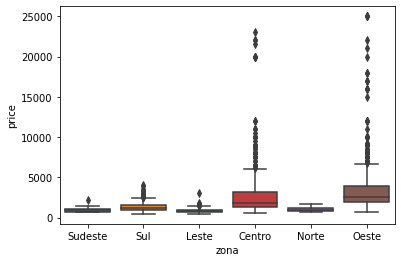

In [21]:
sns.boxplot(x='zona', y='price', data=df_final)

<AxesSubplot:xlabel='zona', ylabel='condo'>

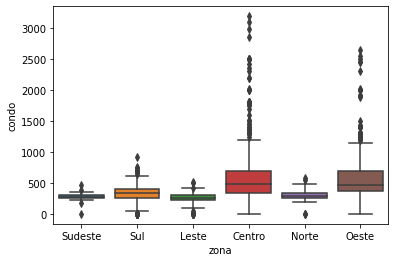

In [22]:
sns.boxplot(x='zona', y='condo', data=df_final)

In [23]:
df_final.to_csv('df_final.csv')

In [24]:
df_final

,link,address,area,bedrooms,bathrooms,garages,others,price,condo,date,neighborhood,zona
132,https://www.vivareal.com.br/imovel/apartamento...,"Avenida São Francisco de Assis, 150 - Putim, S...",50,2,2,1.0,"Elevador, Condomínio fechado, Varanda gourmet,...",800,300.0,2021-06-20 09:31:00,Putim,Sudeste
196,https://www.vivareal.com.br/imovel/apartamento...,Avenida José Gonçalves de Campos - Jardim São ...,46,2,1,1.0,"Elevador, Piscina, Área de serviço, Churrasque...",800,254.0,2021-06-20 09:32:00,Jardim São Leopoldo,Sudeste
211,https://www.vivareal.com.br/imovel/apartamento...,"Chácaras São José, São José dos Campos - SP",60,2,1,1.0,0,1100,380.0,2021-06-20 09:32:00,Chácaras São José,Sudeste
422,https://www.vivareal.com.br/imovel/apartamento...,"Rua Medina - Vila Iracema, São José dos Campos...",56,2,1,1.0,Salão de festas,1100,278.0,2021-06-20 09:33:00,Vila Iracema,Sudeste
770,https://www.vivareal.com.br/imovel/apartamento...,"Vila Iracema, São José dos Campos - SP",47,2,1,1.0,"Varanda, Sala de jantar",750,257.0,2021-06-20 09:35:00,Vila Iracema,Sudeste
...,...,...,...,...,...,...,...,...,...,...,...,...
2850,https://www.vivareal.com.br/imovel/apartamento...,"Jardim Aquarius, São José dos Campos - SP",92,3,3,2.0,0,2500,690.0,2021-06-20 09:50:00,Jardim Aquarius,Oeste
2854,https://www.vivareal.com.br/imovel/apartamento...,"Parque Residencial Aquarius, São José dos Camp...",77,2,2,1.0,0,2500,372.0,2021-06-20 09:50:00,Parque Residencial Aquarius,Oeste
2856,https://www.vivareal.com.br/imovel/apartamento...,"Parque Residencial Aquarius, São José dos Camp...",50,1,2,2.0,0,3000,373.0,2021-06-20 09:50:00,Parque Residencial Aquarius,Oeste
2860,https://www.vivareal.com.br/imovel/apartamento...,"Parque Residencial Aquarius, São José dos Camp...",77,2,2,1.0,0,2350,372.0,2021-06-20 09:50:00,Parque Residencial Aquarius,Oeste


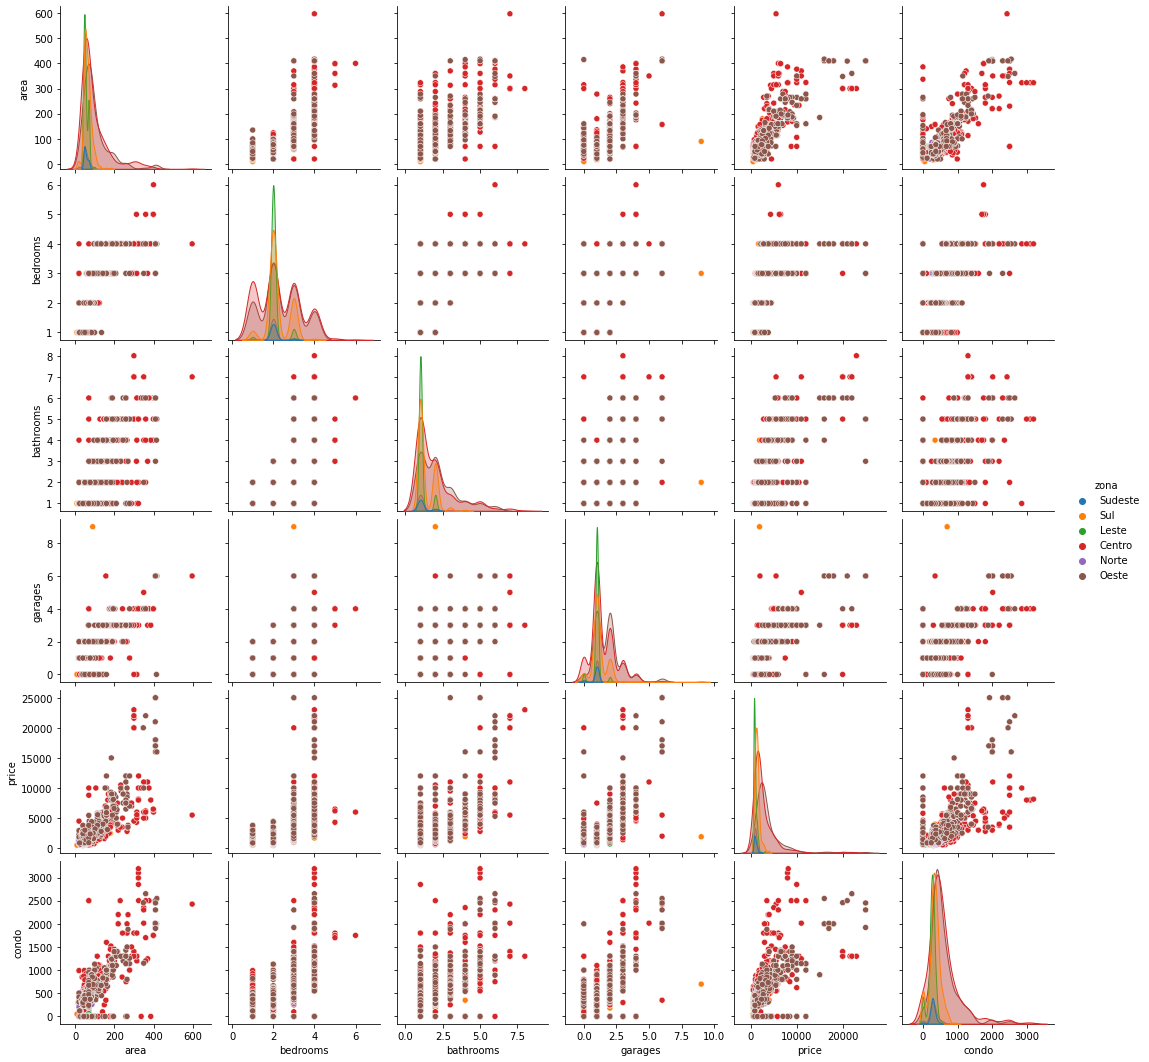

In [25]:
sns.pairplot(df_final, hue='zona')

In [26]:
df_final.columns

Index(['link', 'address', 'area', 'bedrooms', 'bathrooms', 'garages', 'others',
       'price', 'condo', 'date', 'neighborhood', 'zona'],
      dtype='object')

In [27]:
df_final.drop(['link','address','others','date'],axis=1,inplace=True)

In [131]:
X = df_final[['area','bedrooms','bathrooms','garages','condo','zona']]
y = df_final['price']

In [132]:
X.head()

,area,bedrooms,bathrooms,garages,condo,zona
132,50,2,2,1.0,300.0,Sudeste
196,46,2,1,1.0,254.0,Sudeste
211,60,2,1,1.0,380.0,Sudeste
422,56,2,1,1.0,278.0,Sudeste
770,47,2,1,1.0,257.0,Sudeste


In [133]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1680 entries, 132 to 2870
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   area       1680 non-null   int64  
 1   bedrooms   1680 non-null   int64  
 2   bathrooms  1680 non-null   int64  
 3   garages    1680 non-null   float64
 4   condo      1680 non-null   float64
 5   zona       1680 non-null   object 
dtypes: float64(2), int64(3), object(1)
memory usage: 171.9+ KB


In [134]:
X = pd.get_dummies(X)

In [135]:
from sklearn.model_selection import train_test_split

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [138]:
X_train.head()

,area,bedrooms,bathrooms,garages,condo,zona_Centro,zona_Leste,zona_Norte,zona_Oeste,zona_Sudeste,zona_Sul
2789,70,2,1,1.0,300.0,0,1,0,0,0,0
2459,59,2,2,1.0,372.0,1,0,0,0,0,0
2178,233,4,3,3.0,1300.0,0,0,0,1,0,0
279,90,3,2,1.0,570.0,1,0,0,0,0,0
2753,77,2,2,1.0,540.0,1,0,0,0,0,0


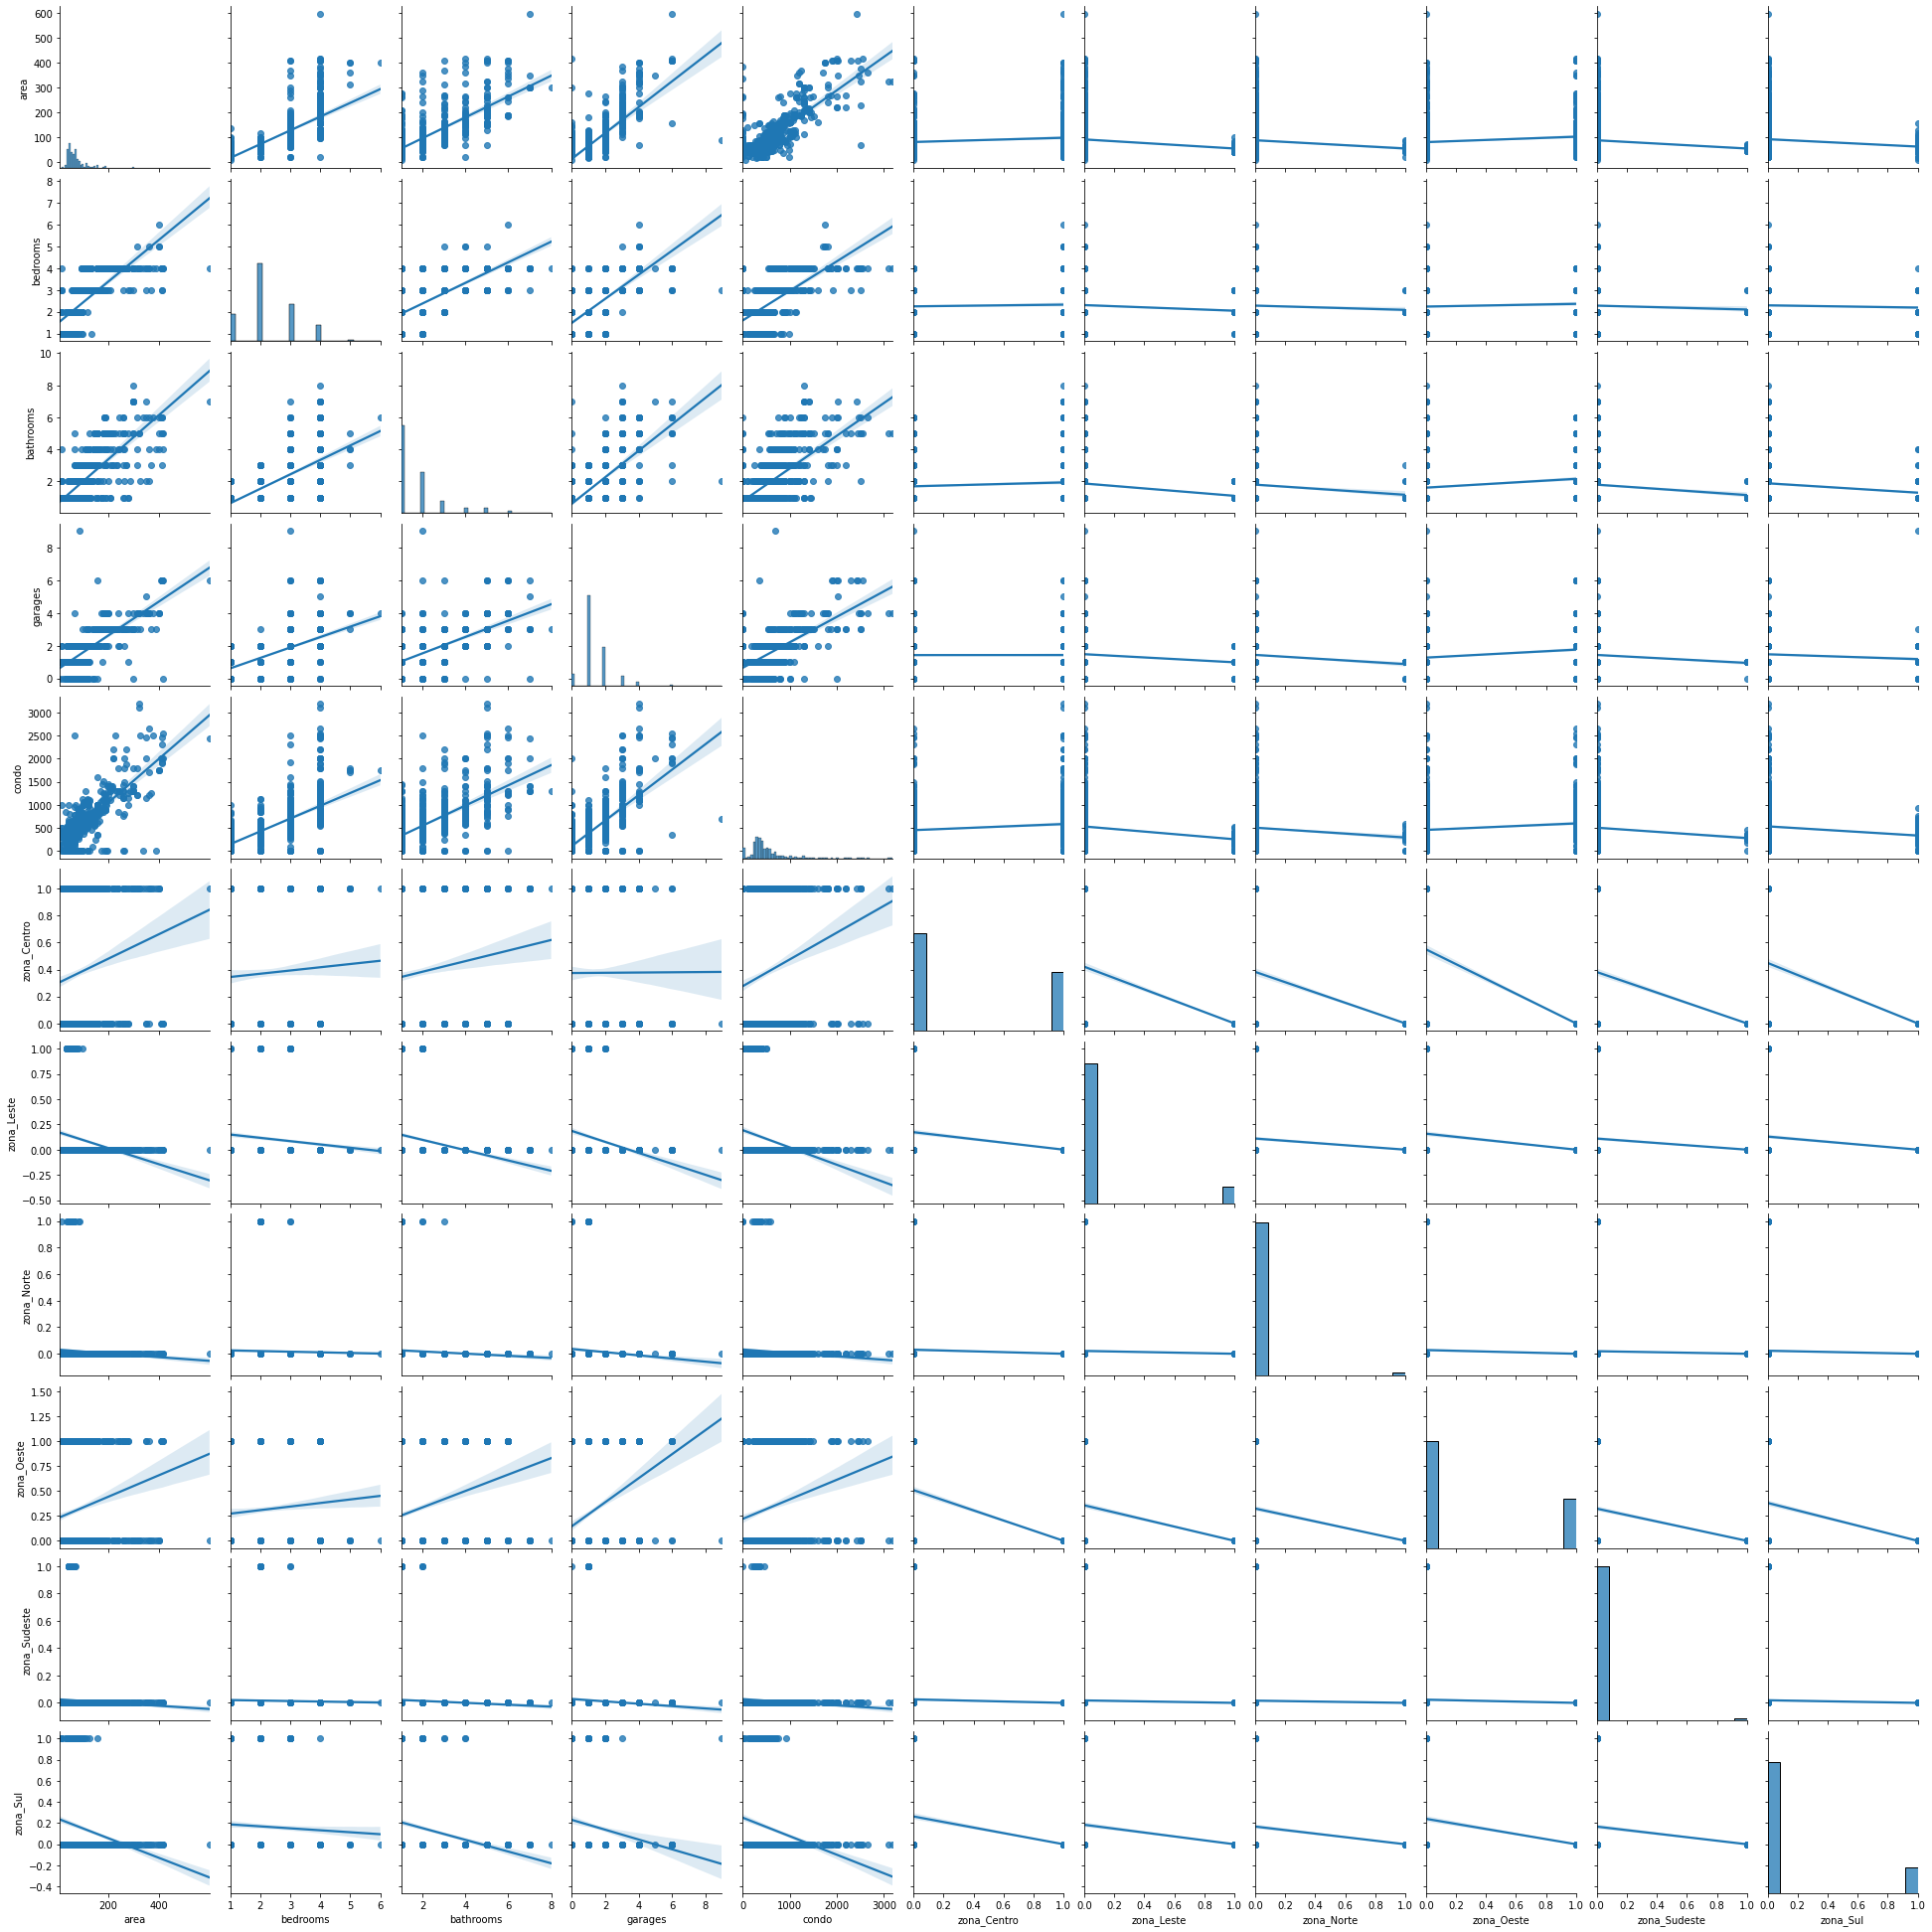

In [139]:
sns.pairplot(X_train, kind='reg')

In [140]:
import lazypredict
import numpy as np
import sklearn

In [141]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [142]:
from sklearn.model_selection import GridSearchCV

In [143]:
parameters = [{'min_samples_leaf':[2,4,6,8], 'max_depth':[4,8,12,16], 'n_estimators':[50,100,200,400]}]

gs = GridSearchCV(rf, parameters, scoring='r2',cv=8)
gs.fit(X_train,y_train)

GridSearchCV(cv=8, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [4, 8, 12, 16],
                          'min_samples_leaf': [2, 4, 6, 8],
                          'n_estimators': [50, 100, 200, 400]}],
             scoring='r2')

In [144]:
gs.best_params_

{'max_depth': 16, 'min_samples_leaf': 2, 'n_estimators': 200}

In [145]:
reg = gs.best_estimator_

In [146]:
from sklearn.model_selection import cross_val_score
train_score = reg.score(X_train,y_train)
validation_score = cross_val_score(reg,X_train,y_train,cv=4)
test_score = reg.score(X_test,y_test)

print('Train score:', train_score)
print('Validation score:', validation_score)
print('Test score:', test_score)

Train score: 0.9565879957622554
Validation score: [0.84156311 0.85422938 0.63190614 0.88433233]
Test score: 0.8865343499790229


In [147]:
import pickle

In [148]:
with open('regressor.pkl', 'wb') as f:
    pickle.dump(reg, f)

In [150]:
price =reg.predict([[50,2,2,1,300,0,0,0,0,1,0]])

In [156]:
print("O preço sugerido para aluguel é de R$: %.2f"%(price))

O preço sugerido para aluguel é de R$: 1080.70
